(1334, 9) 
 
 DATA TYPES
unix           float64
date            object
symbol          object
open           float64
high           float64
low            float64
close          float64
Volume XRP     float64
Volume USDT    float64
dtype: object 
 
 First few rows
           unix        date    symbol    open    high     low   close  \
0  1.640560e+12  12-27-2021  XRP-USDT  0.9200  0.9237  0.9200  0.9226   
1  1.640480e+12  12-26-2021  XRP-USDT  0.9252  0.9334  0.9052  0.9200   
2  1.640390e+12  12-25-2021  XRP-USDT  0.9114  0.9350  0.8981  0.9252   
3  1.640300e+12  12-24-2021  XRP-USDT  0.9941  0.9966  0.8964  0.9115   
4  1.640220e+12  12-23-2021  XRP-USDT  0.9538  1.0167  0.9372  0.9941   

    Volume XRP   Volume USDT  
0    2384512.0  2.198450e+06  
1  163438501.0  1.499400e+08  
2  250074945.0  2.302303e+08  
3  567234092.0  5.377035e+08  
4  479436230.0  4.729372e+08   
 
 Summery
               unix         open         high          low        close  \
count  1.334000e+03  13

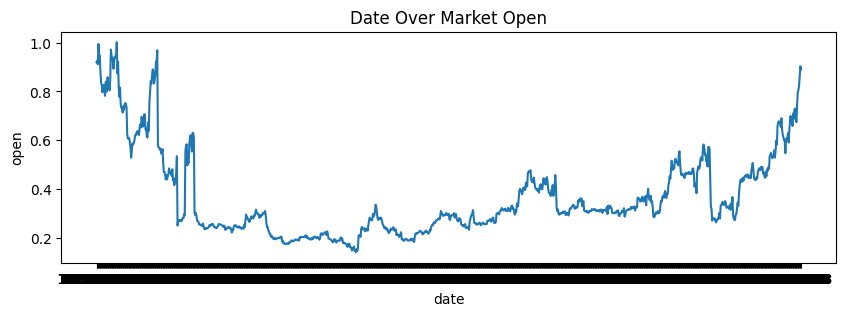

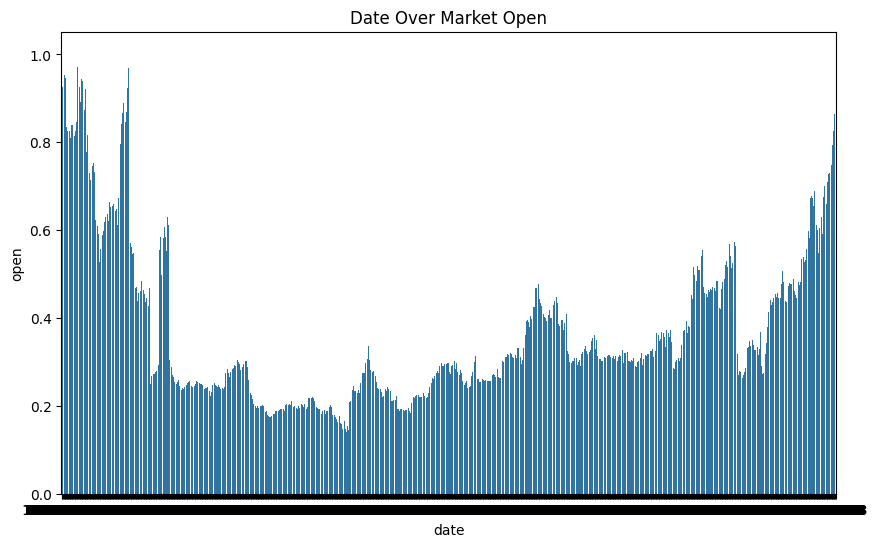

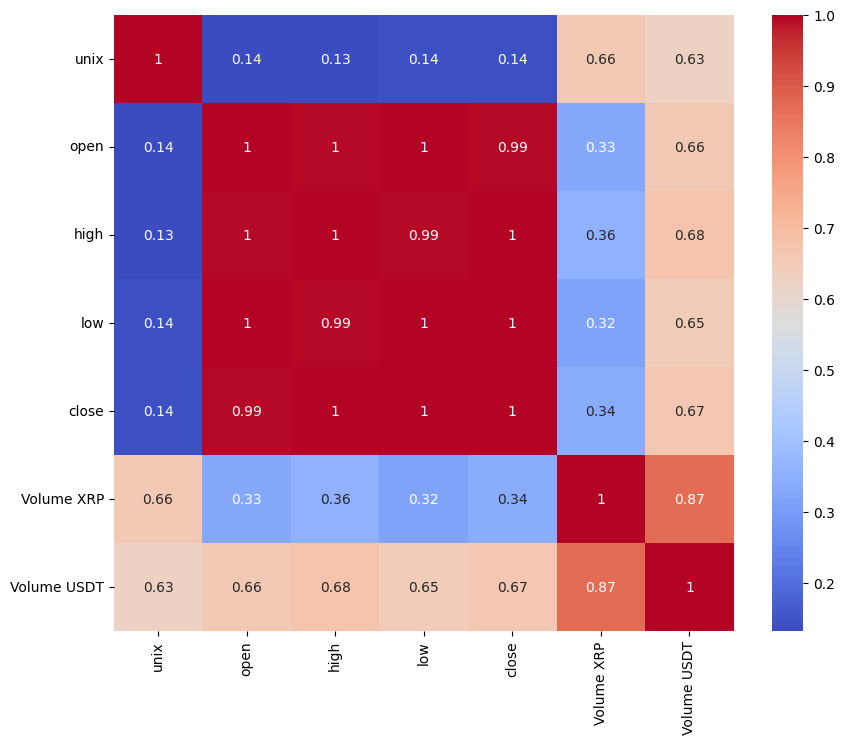

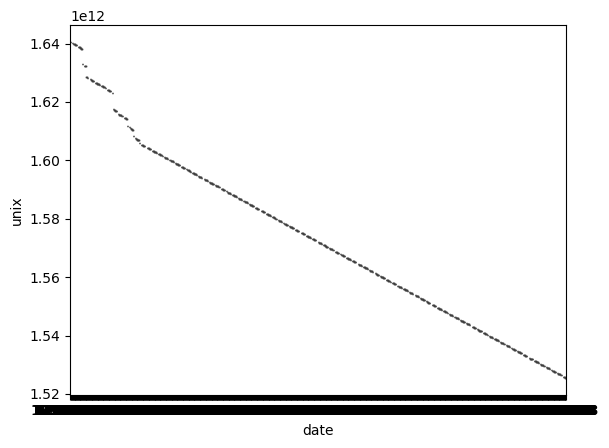

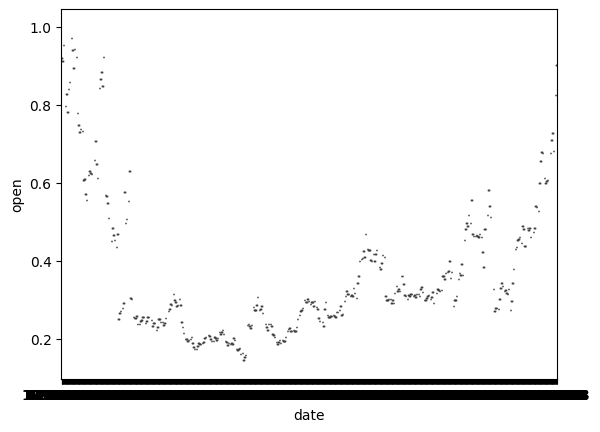

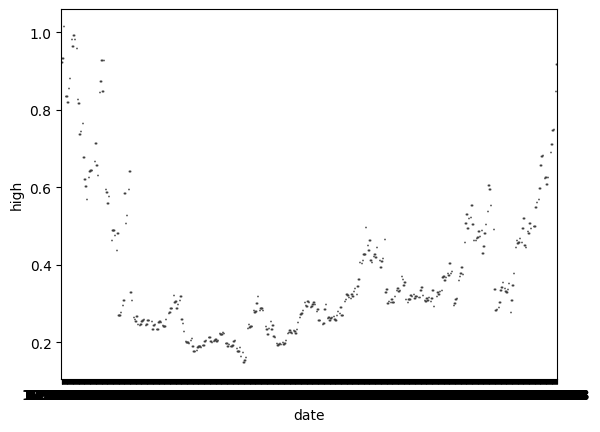

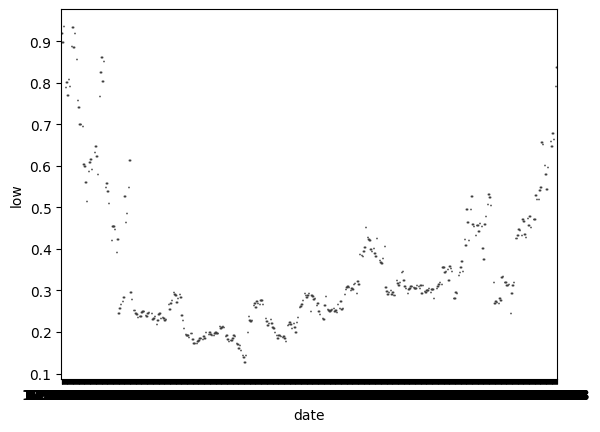

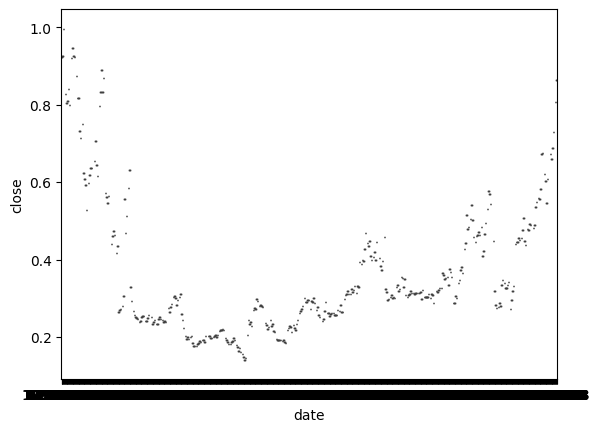

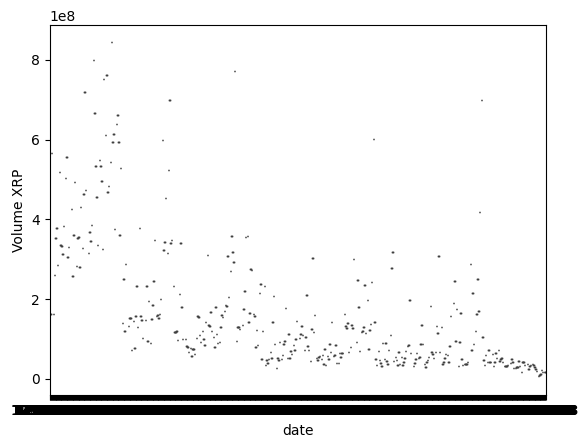

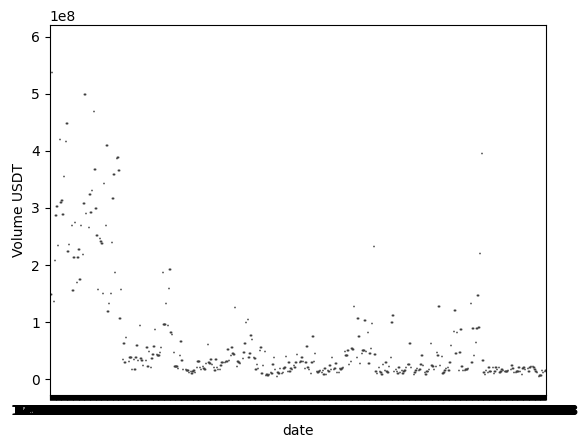

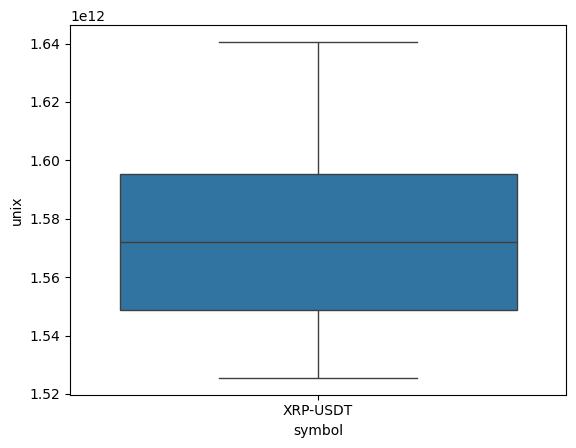

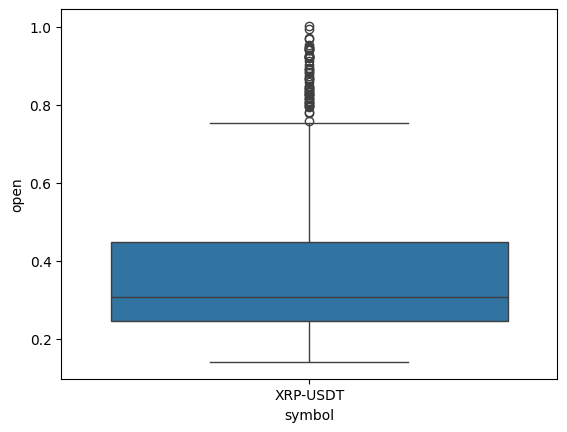

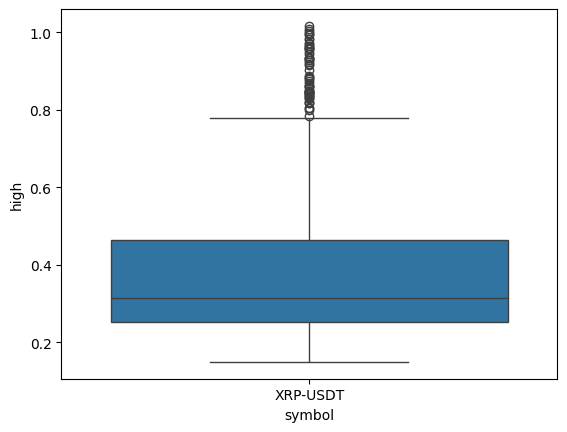

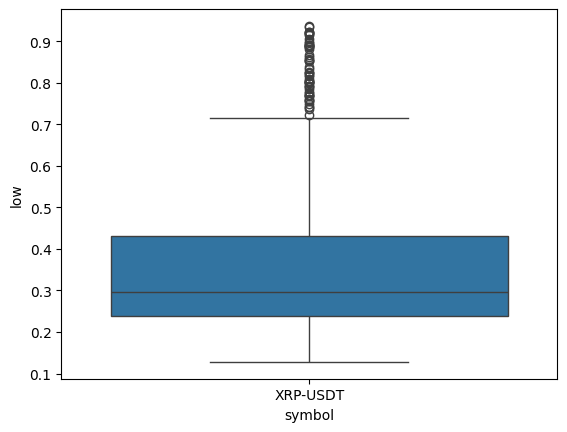

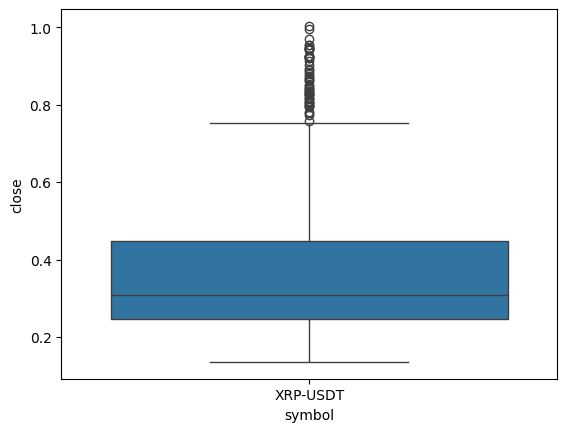

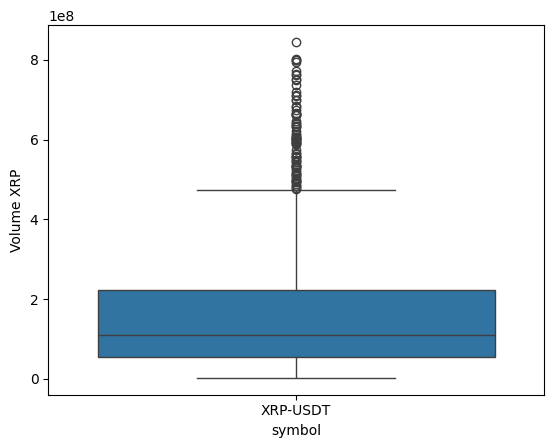

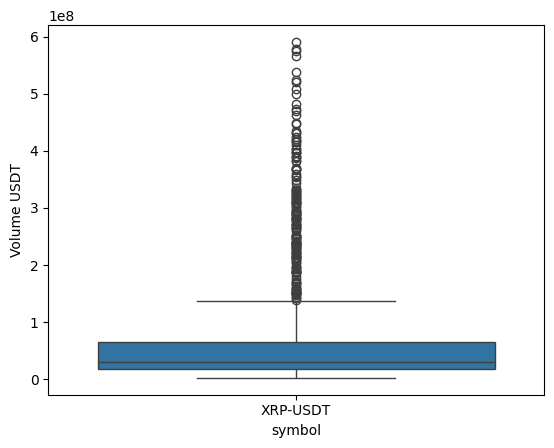

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('currency.csv')

# Shape of the dataset
print(df.shape,"\n","\n","DATA TYPES")


# Data types of columns
print(df.dtypes,"\n","\n","First few rows")

# First few rows
print(df.head(),"\n","\n","Summery")

# Summary statistics
print(df.describe(),"\n","\n","Check iS null")

# Check for missing values
print(df.isnull().sum(),"\n","\n")

# Get the list of numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
print("Numeric Columns:", numeric_columns,"\n","\n")

# Get the list of non-numeric (categorical) columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_columns)

# # Handling missing values (example)
# df = df.dropna()  # or df.fillna(value)

# # Handling duplicates
# df = df.drop_duplicates()

# Handling outliers (example using IQR)
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]


# Select only the relevant columns
df_selected = df[['date', 'open']]
print(df_selected.head())

plt.figure(figsize=(10, 3))
sns.lineplot(data=df_selected, x='date', y='open')
plt.title('Date Over Market Open')
plt.xlabel('date')
plt.ylabel('open')
plt.show()

# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=df_selected, x='work_year', y='remote_ratio')
# plt.title('Remote Ratio vs. Work Year')
# plt.xlabel('Work Year')
# plt.ylabel('Remote Ratio')
# plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_selected, x='date', y='open')
plt.title('Date Over Market Open')
plt.xlabel('date')
plt.ylabel('open')
plt.show()



# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.show()

# Box plots for categorical vs numerical variables
for column in categorical_columns:
    for num_col in numeric_columns:
        sns.boxplot(x=column, y=num_col, data=df)
        plt.show()

# Ensure to replace 'categorical_column' and 'numerical_column' with actual column names in your dataset
categorical_column = 'your_categorical_column'
numerical_column = 'your_numerical_column'

# Pair plot
if categorical_column in df.columns:
    sns.pairplot(df, hue=categorical_column)
    plt.show()

